### Importing Libraries

In [644]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Reading Dataset

In [645]:
df = pd.read_csv('Housing.csv')

In [646]:
df.sample(5) # Display randomly 5 rows from data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
88,6475000,7410,3,1,1,yes,yes,yes,no,yes,2,yes,unfurnished
87,6475000,3960,3,1,1,yes,no,yes,no,no,2,no,semi-furnished
68,6860000,6000,3,1,1,yes,no,no,no,yes,1,no,furnished
60,7140000,6000,3,2,2,yes,yes,no,no,no,1,no,semi-furnished
486,2870000,6000,2,1,1,yes,no,no,no,no,0,no,semi-furnished


In [647]:
df.parking.value_counts()

parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64

In [648]:
df.shape # To get number of rows and column in data

(545, 13)

In [649]:
df.info() # Display the info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [650]:
df.isna().sum() # To check missing value

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

**No missing value found**

In [651]:
df.duplicated().sum() # To check duplicated rows

np.int64(0)

**No duplicated rows found**

In [652]:
df.describe() # display statistical values for numerical columns

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [653]:
df.describe(include='object') # To see stats for categorical column

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


**For hotwaterheating it is highly imbalanced having 520 no out of 545**

## Univariate Analysis

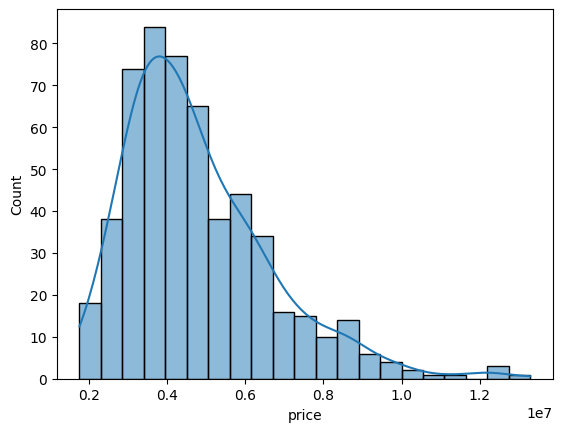

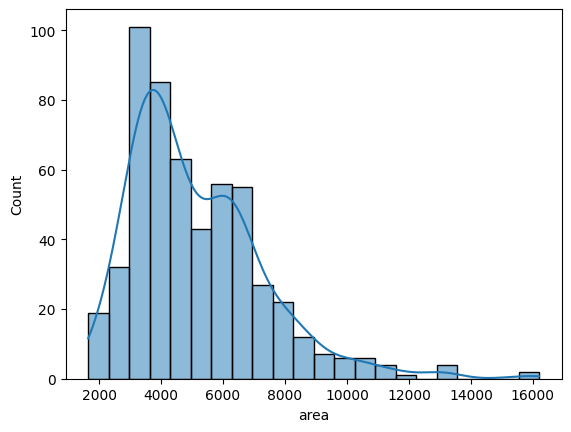

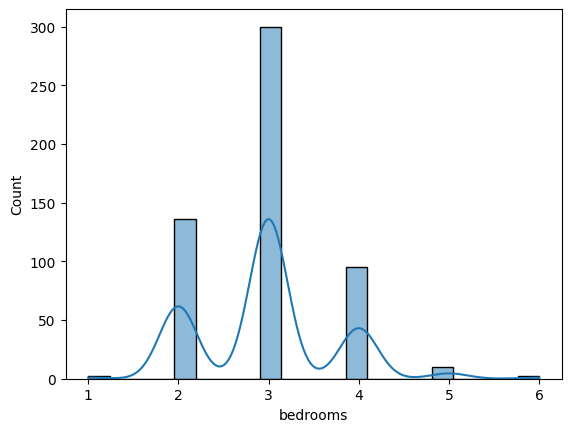

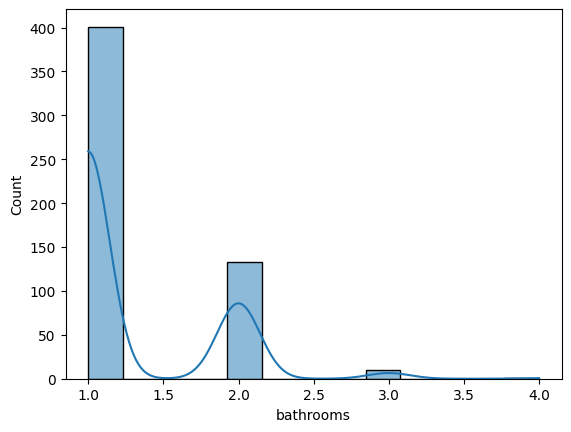

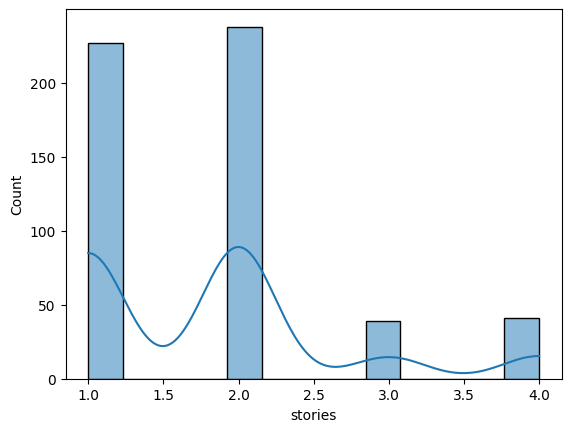

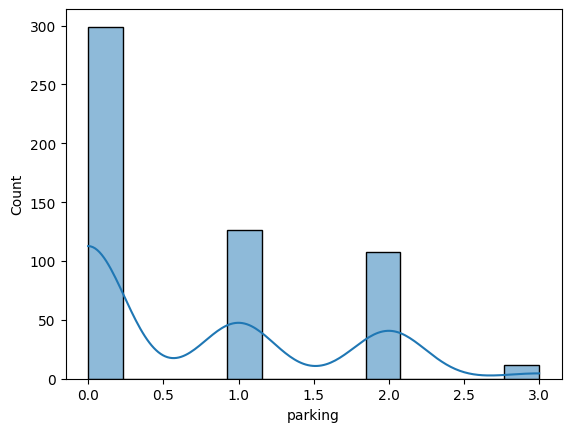

In [654]:
# Plot histogram for all numerical columns
for i in df.select_dtypes(include='number').columns:
    sns.histplot(df[i],kde=True)
    plt.show()

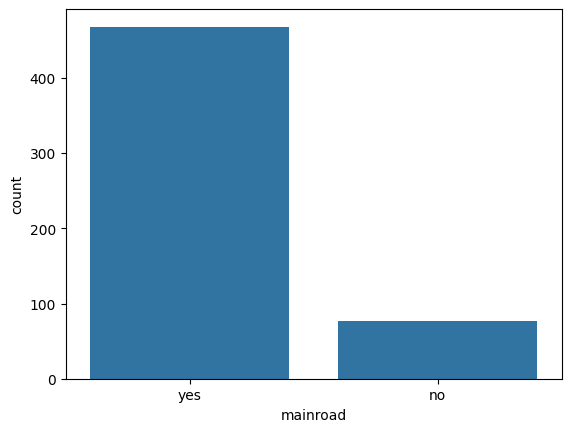

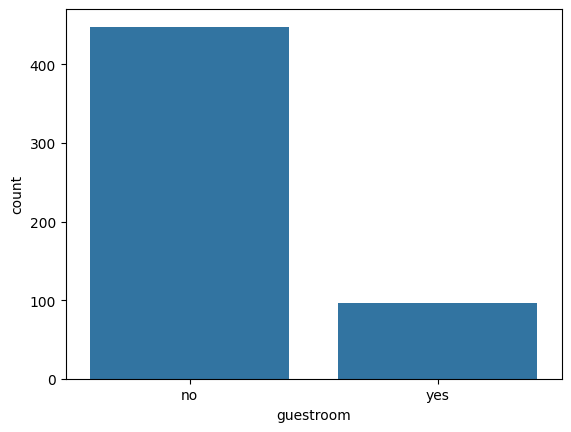

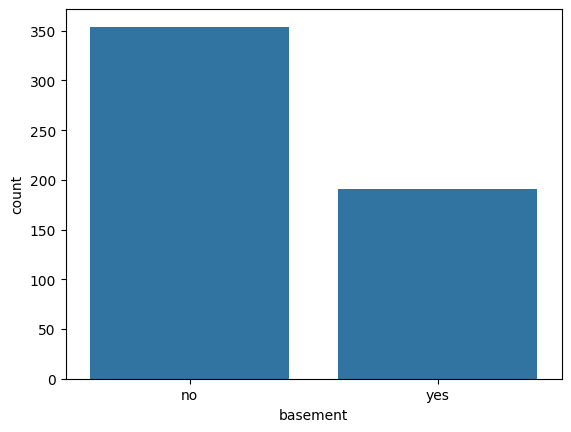

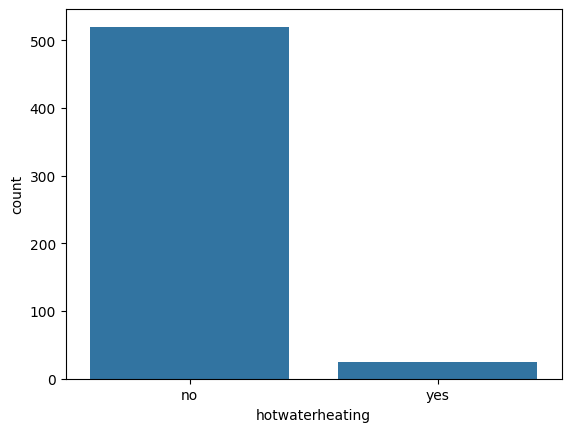

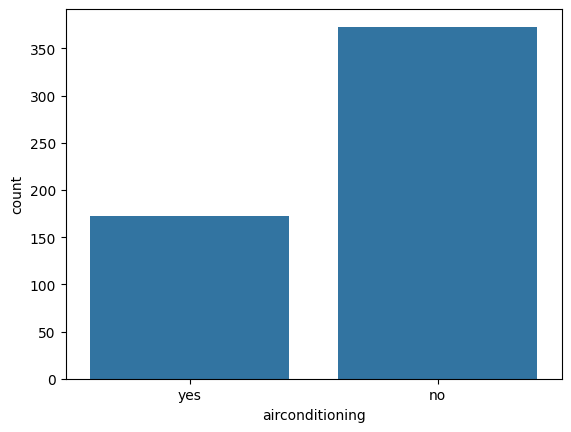

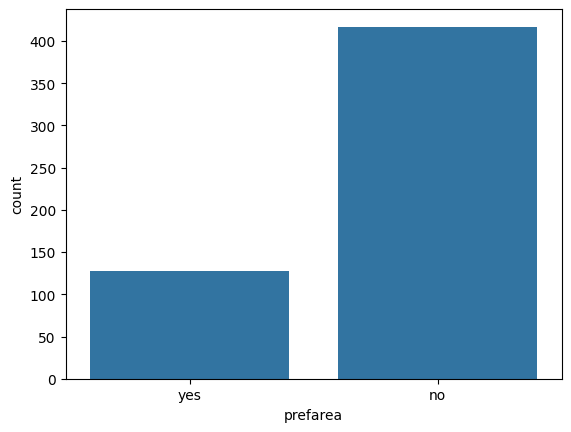

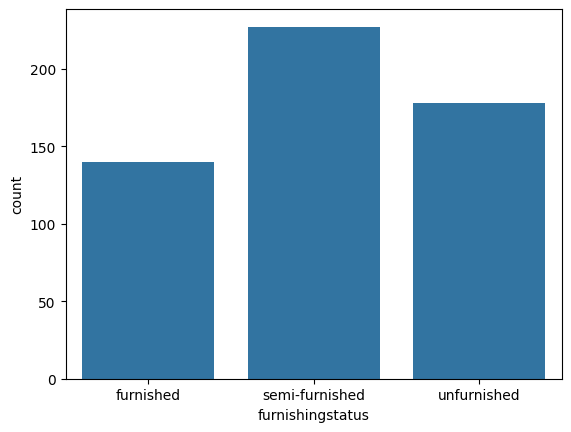

In [655]:
# Plotting countplot for all categorical columns
for i in df.select_dtypes(include='object').columns:
    sns.countplot(df,x=i)
    plt.show()

In [656]:
# Calculating Correlation of Price with numerical columns
for i in df.select_dtypes(include='number').columns:
    print(i,df[i].corr(df['price']))

price 1.0
area 0.5359973457780803
bedrooms 0.3664940257738685
bathrooms 0.5175453394550112
stories 0.4207123661886167
parking 0.38439364863572645


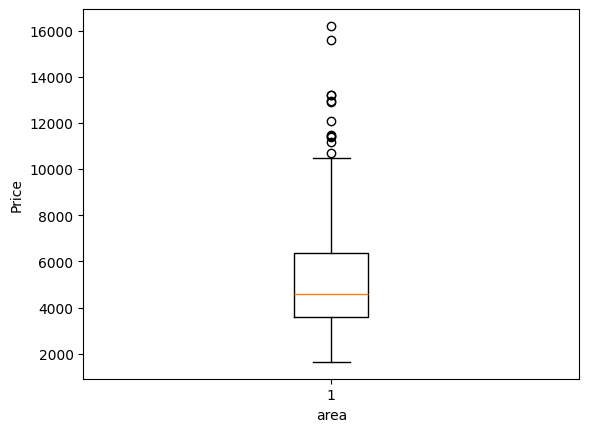

In [657]:
# Plot Boxplot to check for outlier
plt.boxplot(df['area'])
plt.xlabel('area')
plt.ylabel("Price")
plt.show()

#### area has few outlier which need to be handled

### Bivariate Analysis

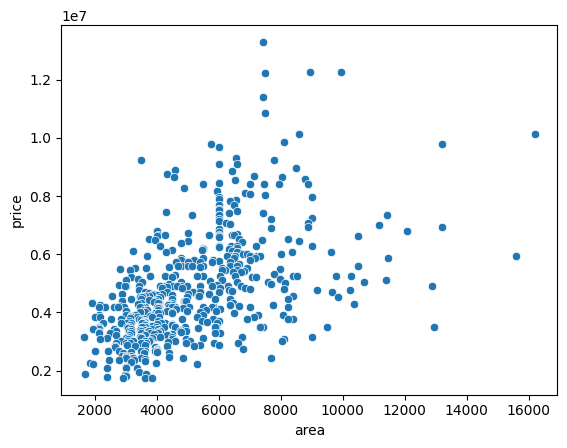

In [658]:
sns.scatterplot(data=df,x='area',y='price')
plt.show()

#### Both area and price_sq.ft have linear relation with price

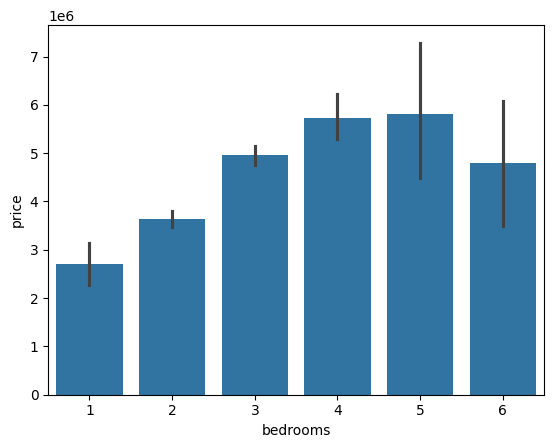

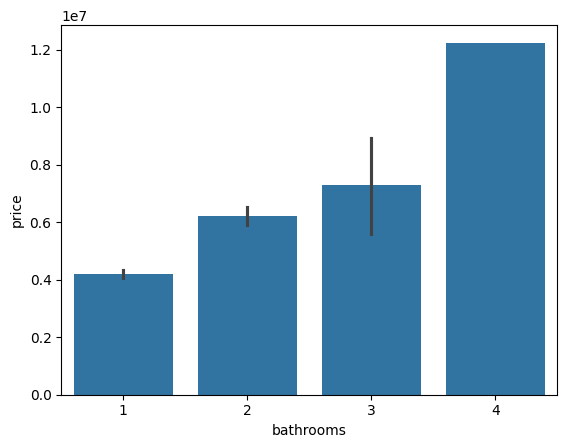

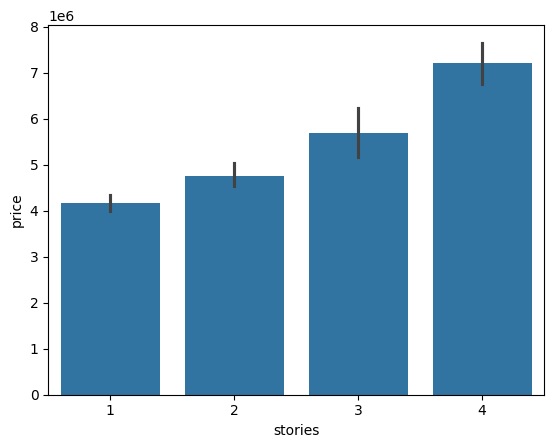

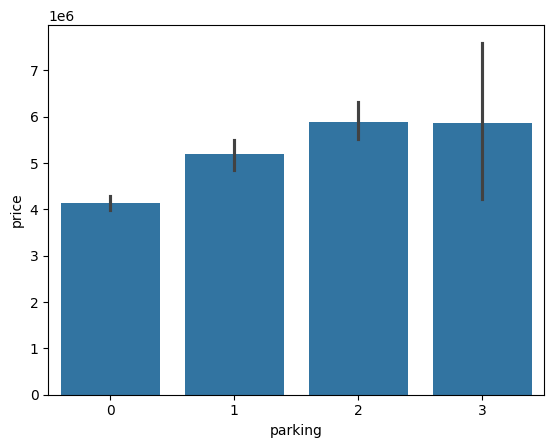

In [659]:
for i in ['bedrooms', 'bathrooms', 'stories', 'parking']:
    sns.barplot(data=df,x=i,y='price')
    plt.show()

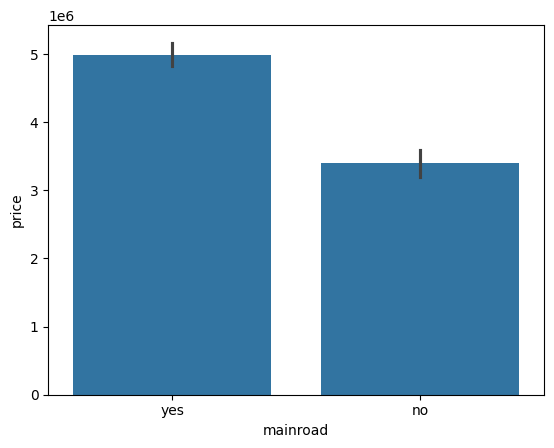

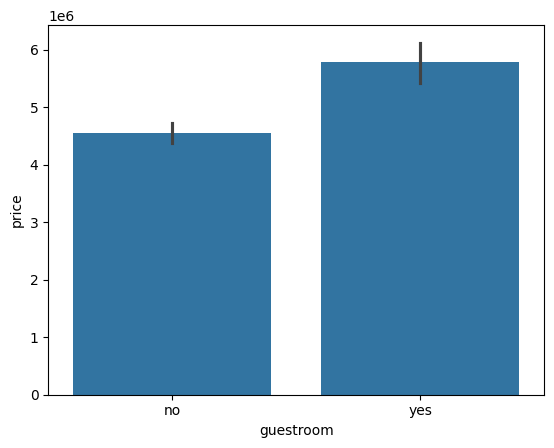

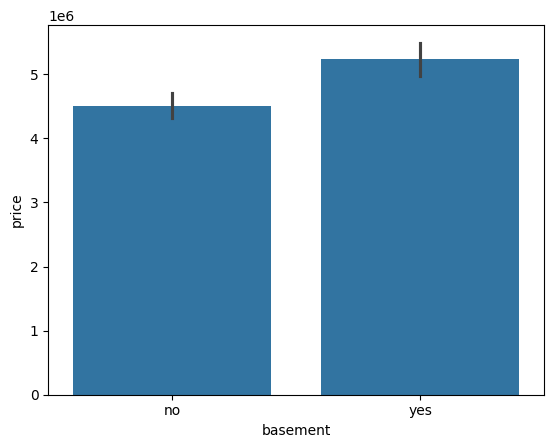

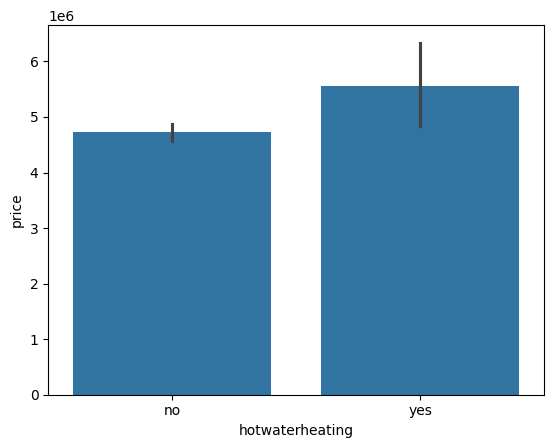

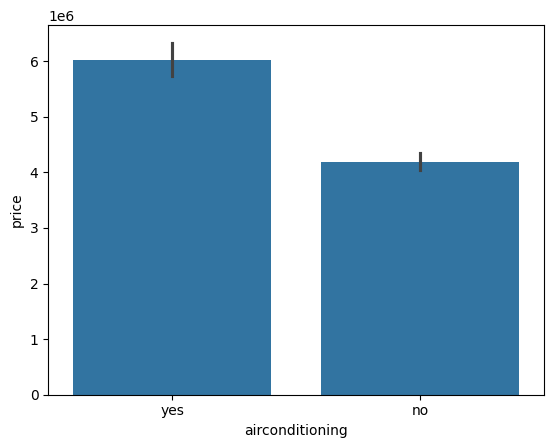

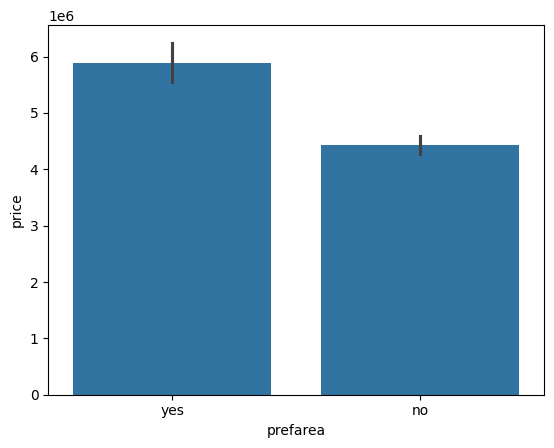

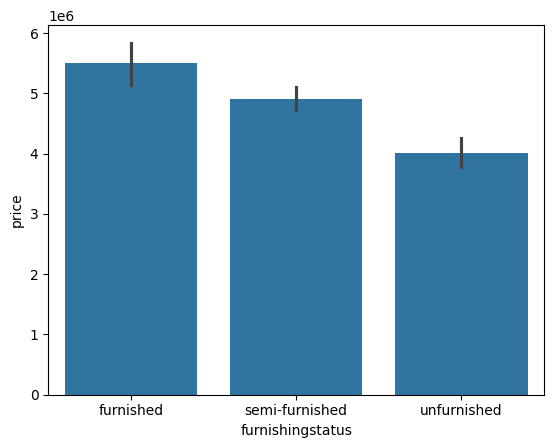

In [660]:
# Ploting barplot for categorical columns with price
for i in df.select_dtypes(include='object').columns:
    sns.barplot(data=df,x=i,y='price')
    plt.show()

In [661]:
for i in df.select_dtypes(include='object').columns:
    print(df.groupby(i)['price'].median())

mainroad
no     3290000.0
yes    4550000.0
Name: price, dtype: float64
guestroom
no     4165000.0
yes    5495000.0
Name: price, dtype: float64
basement
no     4077500.0
yes    4900000.0
Name: price, dtype: float64
hotwaterheating
no     4329500.0
yes    5383000.0
Name: price, dtype: float64
airconditioning
no     3885000.0
yes    5757500.0
Name: price, dtype: float64
prefarea
no     4095000.0
yes    5582500.0
Name: price, dtype: float64
furnishingstatus
furnished         5075000.0
semi-furnished    4585000.0
unfurnished       3430000.0
Name: price, dtype: float64


#### hotwaterheating is highly imbalanced and median value has big difference around 10 lakh need to make sure that model get enough data for both class to train so will use stratified sampling to keep proportion same

In [662]:
#Doing Stratified sampling on hotwaterheating

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in split.split(df, df['hotwaterheating']):
    train_data = df.iloc[train_idx]
    test_data  = df.iloc[test_idx]


In [663]:
x_train = train_data.drop(['price'],axis=1)
x_test = test_data.drop(['price'],axis=1)
y_train = train_data['price']
y_test = test_data['price']

In [664]:
# Capping outlier in the area columns
Q1 = x_train['area'].quantile(0.25)
Q3 = x_train['area'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
x_train['area'] = np.where(x_train['area']>upper,upper,np.where(x_train['area']<lower,lower,x_train['area']))
x_test['area'] = np.where(x_test['area']>upper,upper,np.where(x_test['area']<lower,lower,x_test['area']))

In [665]:
num_cols = df.columns
print(num_cols)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [666]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [667]:
num_cols = ['area']
ohe_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning', 'prefarea']
cat_cols = ['bedrooms', 'bathrooms', 'stories','parking']
ord_cols = ['furnishingstatus']

In [668]:
numeric_transformer = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy='median')),
        ("scaling",StandardScaler())
    ]
)

In [669]:
ohe_transformer = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy='most_frequent')),
        ("encoding",OneHotEncoder(drop='first'))
    ]
)

In [670]:
categorical_transformer = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy='most_frequent'))
    ]
)

In [671]:
ord_transformer = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('ordering',OrdinalEncoder(categories=[['unfurnished','semi-furnished','furnished']]))
    ]
)

In [672]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical',numeric_transformer,num_cols),
        ('categorical',categorical_transformer,cat_cols),
        ('ord',ord_transformer,ord_cols),
        ('ohe',ohe_transformer,ohe_cols)
    ],remainder='passthrough'
)

In [673]:
pipe = Pipeline(
    [
        ('preprocessor',preprocessor),
        ('model',LinearRegression())
    ]
)

In [674]:
pipe.fit(x_train,y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numerical', ...), ('categorical', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [675]:
y_pred = pipe.predict(x_test)

In [676]:
# Calculation Training RMSE
from sklearn.metrics import  root_mean_squared_error,r2_score,mean_absolute_error
y_train_pred = pipe.predict(x_train)
rmse_train = root_mean_squared_error(y_train_pred,y_train)
print('Training rmse :',rmse_train)

Training rmse : 1079243.822091386


In [677]:
# Calculate R2, MAE and RMSE score for test data

print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

R2: 0.7026299010925842
MAE: 730846.9802995496
RMSE: 993618.5078248533


In [678]:
# Compute cross-validation scores using negative RMSE 

from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe,x_train, y_train,scoring='neg_root_mean_squared_error',cv=10)
rmse_score = -scores

In [679]:
def display_scored(scores):
    print('cross_val_score :',scores)
    print('mean of cross val score :',scores.mean())
    print('standard deviation :',scores.std())

display_scored(rmse_score)

cross_val_score : [1138890.11161583  979693.5842719  1178716.27091245 1232540.20764415
 1184447.51895654 1236782.04484591  989631.45506787 1053040.37329466
 1042655.3440199  1178537.79727901]
mean of cross val score : 1121493.4707908228
standard deviation : 92094.11935677085
